<a href="https://colab.research.google.com/github/luisovillista/IA/blob/main/MBD_IAyAA_Actividad_en_Equipos_SouthGermanCreditCard_(V2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Analítica de Negocios - MBD**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad en Equipos

### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas de los integrantes del equipo:**

A01113947 - Agustín Jaime Aguilar Tapia

A01451661 - Jesus Isaias Tec Campos

A00645339 - Karen Esthela Perez Tonches

A01183123 - Luis Miguel Vazquez Salazar

A01451684 - Miguel Angel Higuera Lopez

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [15]:
# Aquí puedes incluir alguna otra librería que requieras durante esta actividad:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


In [16]:
# Cargamos los datos:

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/lavender-brown/South-German-Credit/main/SouthGermanCredit.asc', delim_whitespace=True, header=0)
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [18]:
print(df.columns)

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')


1. Descarga los datos, los cuales nos llevan a un arreglo de 1000 registros y 21 variables. Cambia
los títulos de las columnas al nombre en inglés (originalmente están en alemán). La información
la puedes encontrar en cualquiera de las ligas dadas arriba.

¿Con base a la información de la
variable de salida, “credit_risk”, ¿consideras que estamos con un problema de cLases
desbalanceadas? Justifica tu respuesta.

Respuesta:Sí, estamos ante un problema de clases desbalanceadas. Esto se debe a que hay una mayor cantidad de instancias de buen crédito comparadas con las de mal crédito, lo cual es típico en escenarios de riesgo crediticio. Este desequilibrio puede afectar la capacidad del modelo para identificar correctamente los casos de mal crédito, que suelen ser menos frecuentes pero críticos para la toma de decisiones financieras.



In [19]:
## Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:
# ************* Inlcuye aquí tu código:*****************************

None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.

column_mapping = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

df.rename(columns=column_mapping, inplace=True)
# *********** Aquí termina la sección de agregar código *************

# Desplegar el DataFrame para verificar el resultado
print(df.shape)
df.head().T

(1000, 21)


,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


In [20]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0.
# Como las técnicas de balanceo y en general en lo problemas de Machine Learning a la clase de interés y generalmente
# la clase minoritaria se le etiqueta como 1. Entonces invirtamos dichos regitros.
# Recuerda que esta base de datos es de principios de los años 90s, donde la estandarización de los datos todavía
# no estaba estandarizada y cada quien etiquetaba los datos a su mejor parecer.

df['credit_risk'] = df['credit_risk'].map({0:1, 1:0})
print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


Este código primero usa el método .map() para cambiar los valores de la columna credit_risk, donde el valor original 0 se cambia a 1 y el valor original 1 a 0, reflejando así correctamente la clase de interés como 1 (mal cliente) y la otra clase como 0 (buen cliente). Luego, utiliza el método .value_counts() para contar cuántas instancias hay de cada clase y lo imprime, lo que debería resultar en 700 instancias de la clase 0 (buen cliente) y 300 instancias de la clase 1 (mal cliente), reflejando el desbalance original del conjunto de datos.

Buen Cliente: 700

Mal Cliente: 300


### ++++++++  +++++++++++

None

### ++++++++ +++++++++++

## **Ejercicio 2**

2. Realiza una partición de los datos en los conjuntos de entrenamiento, validación y prueba, del
70%, 15% y 15%, respectivamente.

In [21]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
from sklearn.model_selection import train_test_split

# Asumiendo que df es tu DataFrame y 'credit_risk' es la variable objetivo
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Primera partición: Dividir en entrenamiento (70%) y temporal (30% para validación + prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Segunda partición: Dividir el conjunto temporal en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostremos las dimensiones de la partición generada:
print(X_train.shape, y_train.shape)  # Entrenamiento
print(X_val.shape, y_val.shape)      # Validación
print(X_test.shape, y_test.shape)    # Prueba


(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


Estas dimensiones confirman que los conjuntos de datos están correctamente preparados para proceder con la fase de modelado, validación y pruebas

## **Ejercicio 3**

3. Describe el significado de las 21 variables de acuerdo con la información que se encuentra en la
liga de la UCI de la cual descargaste los datos. De acuerdo a dicha página clasifica las variables en
los siguientes tres tipos: Categóricas, Ordinales (y/o discretizadas) y Numéricas.

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### **Variables Categóricas:**

-status: Estado de la cuenta bancaria del deudor.

-credit_history: Historial de cumplimiento de créditos previos o concurrentes.

-purpose: Propósito del crédito.

-savings: Ahorros del deudor.

-personal_status_sex: Información combinada sobre sexo y estado civil.

-other_debtors: Existencia de otro deudor o garante.

-other_installment_plans: Planes de cuotas de otros proveedores.

-housing: Tipo de vivienda.





### **Variables Ordinales (y/o discretizadas):**

-employment_duration: Duración del empleo con el empleador actual.

-installment_rate: Cuotas de crédito como porcentaje del ingreso disponible.

-present_residence: Tiempo en la residencia actual.

-property: Propiedad más valiosa del deudor.

-number_credits: Número de créditos en el banco.

-job: Calidad del trabajo del deudor.




### **Variables Numéricas:**

-duration: Duración del crédito en meses.

-amount: Monto del crédito.

-age: Edad en años.


### **Variables Binarias:**

-foreign_worker: Si el deudor es un trabajador extranjero.

-telephone: Si hay línea telefónica a nombre del deudor.

-credit_risk: Cumplimiento del contrato de crédito.

-people_liable: Número de personas dependientes financieramente.



In [22]:
# Clasificación de variables
categorical_vars = [
    'status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans',
    'housing'
]

ordinal_vars = [
    'employment_duration', 'installment_rate', 'present_residence',
    'property', 'number_credits', 'job'
]

numeric_vars = [
    'duration', 'amount', 'age'
]

# Variables binarias como 'telephone' y 'credit_risk' no están incluidas en estas listas
# ya que podrían manejarse de manera especial dependiendo del contexto del análisis


## **Ejercicio 4**

Define una lista que incluya solamente las variables de entrada que identificaste como
categóricas en el ejercicio anterior. La llamaremos “lista_Xcat” y la usaremos para desplegar los
niveles de cada una de estas variables.

In [23]:
# Define una lista que incluya solamente las variables categóricas de
# entrada, de acuerdo a la selección que hiciste en el ejercicio anterior.
# La llamaremos “lista_Xcat” y la usaremos para desplegar los niveles de
# cada una de estas variables:

# ************* Inlcuye aquí tu código:*****************************
# Definición de la lista con los nombres de las variables categóricas
lista_Xcat = [
    'status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing', 'foreign_worker'
]

# *********** Aquí termina la sección de agregar código *************

# Desplegar los niveles de cada variable categórica en el conjunto de entrenamiento
for w in lista_Xcat:
    print(X_train[w].value_counts().values)
    print(X_train[w].value_counts() / X_train.shape[0])
    print('\n')


[279 190 188  43]
4    0.398571
1    0.271429
2    0.268571
3    0.061429
Name: status, dtype: float64


[371 204  64  34  27]
2    0.530000
4    0.291429
3    0.091429
1    0.048571
0    0.038571
Name: credit_history, dtype: float64


[199 159 114  82  70  32  18  10   9   7]
3     0.284286
0     0.227143
2     0.162857
1     0.117143
9     0.100000
6     0.045714
5     0.025714
10    0.014286
4     0.012857
8     0.010000
Name: purpose, dtype: float64


[428 129  73  42  28]
1    0.611429
5    0.184286
2    0.104286
3    0.060000
4    0.040000
Name: savings, dtype: float64


[394 205  60  41]
3    0.562857
2    0.292857
4    0.085714
1    0.058571
Name: personal_status_sex, dtype: float64


[638  34  28]
1    0.911429
3    0.048571
2    0.040000
Name: other_debtors, dtype: float64


[571  95  34]
3    0.815714
1    0.135714
2    0.048571
Name: other_installment_plans, dtype: float64


[505 114  81]
2    0.721429
1    0.162857
3    0.115714
Name: housing, dtype: float64


[678  22]
2 

In [24]:
categorical_vars

['status',
 'credit_history',
 'purpose',
 'savings',
 'personal_status_sex',
 'other_debtors',
 'other_installment_plans',
 'housing']

Los resultados muestran la distribución de las variables categóricas en el conjunto de entrenamiento, destacando la variabilidad y predominancia de ciertos niveles dentro de cada variable. Por ejemplo, en status, la mayoría de los deudores no tienen cuenta corriente o tienen saldo negativo. En credit_history, la mayoría tiene un historial crediticio existente pagado adecuadamente hasta ahora. Estas distribuciones son cruciales para entender las características del conjunto de datos y cómo podrían influir en la predicción del riesgo crediticio.

## **Ejercicio 5**

In [25]:
# De acuerdo con la información de las variables categóricas desplegada en el
# ejercicio anterior, identifica las variables que tienen niveles abajo del 3%
# de información. Con cada una de estas variables identificadas utiliza la
# función map() de Python para agrupar dichos niveles en un nuevo nivel, de
# manera que se tenga ahora una cantidad mayor o igual al 3% de información:



# Define las categorías de variables según tu clasificación
categorical_vars = [
    'status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans',
    'housing'
]

ordinal_vars = [
    'employment_duration', 'installment_rate', 'present_residence',
    'property', 'number_credits', 'job'
]

# Lista de variables categóricas y ordinales para analizar
variables_to_analyze = categorical_vars + ordinal_vars

# Identificar niveles con menos del 3% de las observaciones para cada variable
for var in variables_to_analyze:
    print(f"Analizando {var}:")
    value_counts = df[var].value_counts(normalize=True)
    low_info_levels = value_counts[value_counts < 0.03]
    if not low_info_levels.empty:
        print(f"Variables con menos del 3% de información en '{var}':\n{low_info_levels}\n")
    else:
        print(f"No hay niveles por debajo del 3% en '{var}'.\n")


Analizando status:
No hay niveles por debajo del 3% en 'status'.

Analizando credit_history:
No hay niveles por debajo del 3% en 'credit_history'.

Analizando purpose:
Variables con menos del 3% de información en 'purpose':
5     0.022
10    0.012
4     0.012
8     0.009
Name: purpose, dtype: float64

Analizando savings:
No hay niveles por debajo del 3% en 'savings'.

Analizando personal_status_sex:
No hay niveles por debajo del 3% en 'personal_status_sex'.

Analizando other_debtors:
No hay niveles por debajo del 3% en 'other_debtors'.

Analizando other_installment_plans:
No hay niveles por debajo del 3% en 'other_installment_plans'.

Analizando housing:
No hay niveles por debajo del 3% en 'housing'.

Analizando employment_duration:
No hay niveles por debajo del 3% en 'employment_duration'.

Analizando installment_rate:
No hay niveles por debajo del 3% en 'installment_rate'.

Analizando present_residence:
No hay niveles por debajo del 3% en 'present_residence'.

Analizando property:
No

## **Ejercicio 6**

In [26]:
# Agrupar niveles con menos del 3% en 'Otros'
def agrupar_niveles_bajos(df, columnas):
    for columna in columnas:
        conteo = df[columna].value_counts(normalize=True)
        niveles_bajos = conteo[conteo < 0.03].index
        df[columna] = df[columna].apply(lambda x: 'Otros' if x in niveles_bajos else x)

# Columnas identificadas con niveles por debajo del 3%
columnas_a_modificar = ['purpose', 'number_credits', 'job']

# Aplicar la función de agrupación
agrupar_niveles_bajos(df, columnas_a_modificar)

# Verificar los cambios
for columna in columnas_a_modificar:
    print(f"Distribución actualizada de '{columna}':")
    print(df[columna].value_counts(normalize=True))
    print("\n")


Distribución actualizada de 'purpose':
3        0.280
0        0.234
2        0.181
1        0.103
9        0.097
Otros    0.055
6        0.050
Name: purpose, dtype: float64


Distribución actualizada de 'number_credits':
1        0.633
2        0.333
Otros    0.034
Name: number_credits, dtype: float64


Distribución actualizada de 'job':
3        0.630
2        0.200
4        0.148
Otros    0.022
Name: job, dtype: float64




In [27]:
# Solamente para el o los factores que modificaste en el ejercicio anterior
# despliega la cantidad porcentual de información que tienes ahora en cada
# nivel, para comprobar que efectivamente todos quedaron arriba del 3%:


# ************* Inlcuye aquí tu código:*****************************

print(X_train['purpose'].value_counts().values)
print(X_train['purpose'].value_counts() / X_train.shape[0])

# *********** Aquí termina la sección de agregar código *************

[199 159 114  82  70  32  18  10   9   7]
3     0.284286
0     0.227143
2     0.162857
1     0.117143
9     0.100000
6     0.045714
5     0.025714
10    0.014286
4     0.012857
8     0.010000
Name: purpose, dtype: float64


## **Ejercicio 7**

### **Justifica el procedimiento realizado en el ejercicio 5, En particular, indica en qué puede ayudar al problema y cuáles podrían ser sus inconvenientes:**

Al agrupar niveles poco comunes bajo la categoría "Otros", simplificamos el análisis, concentrándonos en tendencias más significativas y mejorando la precisión del modelo. Esto previene el sobreajuste y facilita la interpretación. Sin embargo, podría ignorar patrones únicos de grupos pequeños, potencialmente relevantes para decisiones específicas. Este equilibrio entre generalización y detalle es crucial en la toma de decisiones basada en datos, especialmente en contextos donde la precisión y la comprensión profunda de los segmentos del cliente son fundamentales.

## **Ejercicio 8**

Para evitar el filtrado de información realiza ahora la misma transformación del ejercicio 5
anterior a la(s) misma(s) variable(s) en los conjuntos de validación y de prueba.

In [28]:
# Función para agrupar niveles bajos en "Otros"
def agrupar_niveles_bajos_en_otros(serie, umbral=0.03):
    value_counts = serie.value_counts(normalize=True)
    low_info_levels = value_counts[value_counts < umbral]
    if not low_info_levels.empty:
        niveles_bajos = low_info_levels.index.tolist()
        serie.replace(niveles_bajos, 'Otros', inplace=True)

# Aplica la transformación a los conjuntos de entrenamiento, validación y prueba
conjuntos = [X_train, X_val, X_test]
for conjunto in conjuntos:
    for var in variables_to_analyze:
        agrupar_niveles_bajos_en_otros(conjunto[var])

# Verifica los resultados
for conjunto, nombre_conjunto in zip([X_train, X_val, X_test], ['Entrenamiento', 'Validación', 'Prueba']):
    print(f"Niveles de las variables categóricas en el conjunto de {nombre_conjunto}:")
    for var in variables_to_analyze:
        print(f"{var}:\n{conjunto[var].value_counts(normalize=True)}\n")


Niveles de las variables categóricas en el conjunto de Entrenamiento:
status:
4    0.398571
1    0.271429
2    0.268571
3    0.061429
Name: status, dtype: float64

credit_history:
2    0.530000
4    0.291429
3    0.091429
1    0.048571
0    0.038571
Name: credit_history, dtype: float64

purpose:
3        0.284286
0        0.227143
2        0.162857
1        0.117143
9        0.100000
Otros    0.062857
6        0.045714
Name: purpose, dtype: float64

savings:
1    0.611429
5    0.184286
2    0.104286
3    0.060000
4    0.040000
Name: savings, dtype: float64

personal_status_sex:
3    0.562857
2    0.292857
4    0.085714
1    0.058571
Name: personal_status_sex, dtype: float64

other_debtors:
1    0.911429
3    0.048571
2    0.040000
Name: other_debtors, dtype: float64

other_installment_plans:
3    0.815714
1    0.135714
2    0.048571
Name: other_installment_plans, dtype: float64

housing:
2    0.721429
1    0.162857
3    0.115714
Name: housing, dtype: float64

employment_duration:
3    

Aproximadamente el 28.43% de los registros en el conjunto de entrenamiento tienen 'purpose' igual a 3, aproximadamente el 22.71% tienen 'purpose' igual a 0, y así sucesivamente.

## **Ejercicio 9**

In [29]:
#	Define una lista que incluya solamente las variables de entrada que identificaste
# como ordinales en el ejercicio 3 y otra para las numéricas. La llamaremos
# “lista_Xord” y "lista_Xnum" y la usaremos para visualizar su información:

# ************* Inlcuye aquí tu código:*****************************

# Lista de variables ordinales
lista_Xord = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']

# Lista de variables numéricas
lista_Xnum = ['duration', 'amount', 'age']



# *********** Aquí termina la sección de agregar código *************

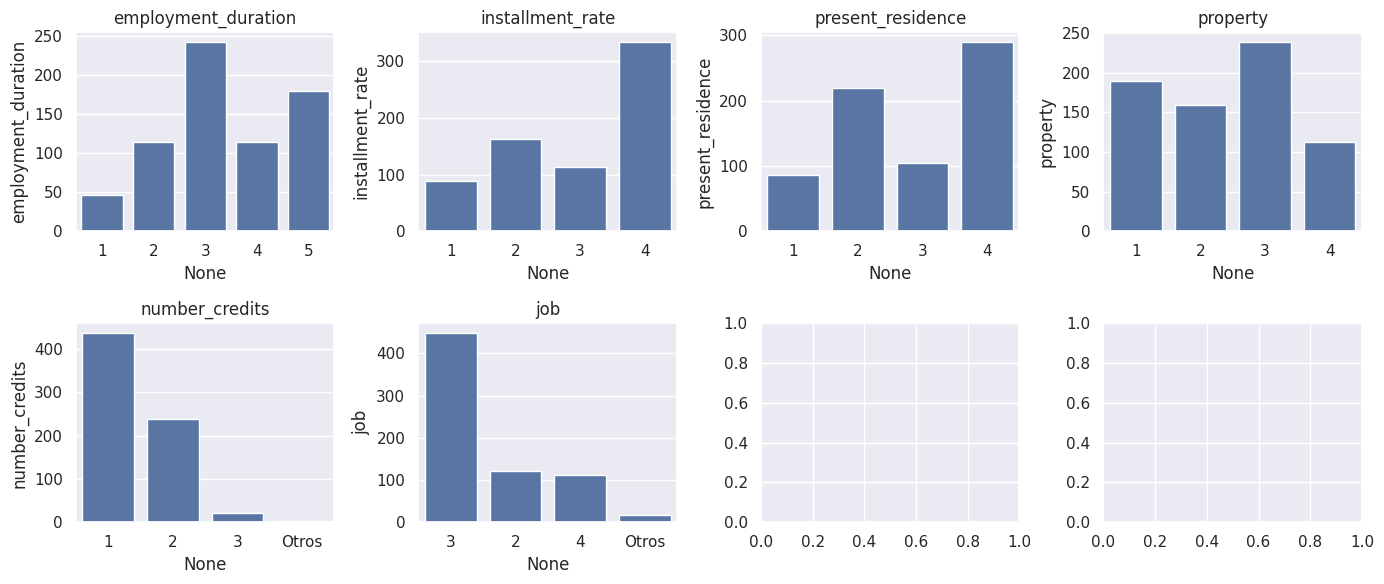

In [30]:
# Visualizamos la información de las variables ordinales en gráficos de barra
# a partir de la lista que definiste arriba y solo del conjunto de
# entrenamiento para evitar el filtrado de información:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14,6)})
fig, axes = plt.subplots(2,4)
for k, w in enumerate(lista_Xord):
    plt.subplot(2,4,k+1)
    sns.barplot(x=X_train[w].value_counts().index, y=X_train[w].value_counts())
    plt.title(w)
plt.tight_layout()
plt.show()
# NOTA: No tienen que ser 8 los gráficos, si definiste como ordinales una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

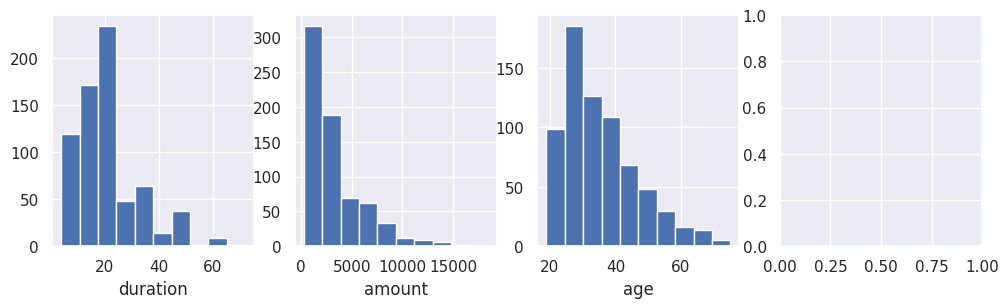

In [31]:
# Visualizamos la información de las variables numéricas en histogramas
# a partir de la lista que definiste arriba, y solo del conjunto de
# entrenamiento para evitar el filtrado de información:

sns.set(rc={'figure.figsize':(12,3)})
fig, axes = plt.subplots(1,4)
tmp = X_train[lista_Xnum]
for k in range(0,3):
  plt.subplot(1,4,k+1)
  plt.hist(tmp[tmp.columns[k]])
  xlabels = list(tmp.value_counts().index)
  plt.xlabel(tmp.columns[k])
plt.show()


# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Qué conclusiones puedes obtener de estos gráficos?**

**Para las variables numéricas, observamos las siguientes características:**

1. Duration: La duración de los créditos muestra una distribución sesgada hacia la izquierda, lo que indica que la mayoría de los créditos tienen plazos más cortos.

2. Amount: La cantidad del crédito también está sesgada a la izquierda, lo que sugiere que la mayoría de los créditos son de montos menores.

3. Age: La edad de los solicitantes parece tener una distribución más bien bimodal, con picos en los rangos más jóvenes y una tendencia a disminuir a medida que aumenta la edad.

**Para las variables ordinales:**

1. Employment Duration: La duración del empleo parece tener una distribución relativamente uniforme, con una ligera tendencia hacia empleos de menor duración.

2. Installment Rate: La tasa de cuotas tiene una clara preferencia por valores más altos, lo que podría indicar una tendencia a tener mayores porcentajes de pago en relación con los ingresos disponibles.

3. Present Residence: El tiempo de residencia actual muestra una preferencia por períodos más largos, lo que sugiere que muchos solicitantes han vivido en su residencia actual durante un tiempo considerable.

4. Property: Parece haber una distribución bastante uniforme en la propiedad más valiosa del deudor, lo que indica una diversidad en los tipos de propiedad.

5. Number of Credits: La mayoría de los solicitantes parece tener pocos créditos en el banco, lo cual es común en la población general.

6. Job: Hay una preferencia por ciertos tipos de trabajos, lo que podría reflejar las condiciones económicas o el mercado laboral en la región de los datos


# **Ejercicio 10**

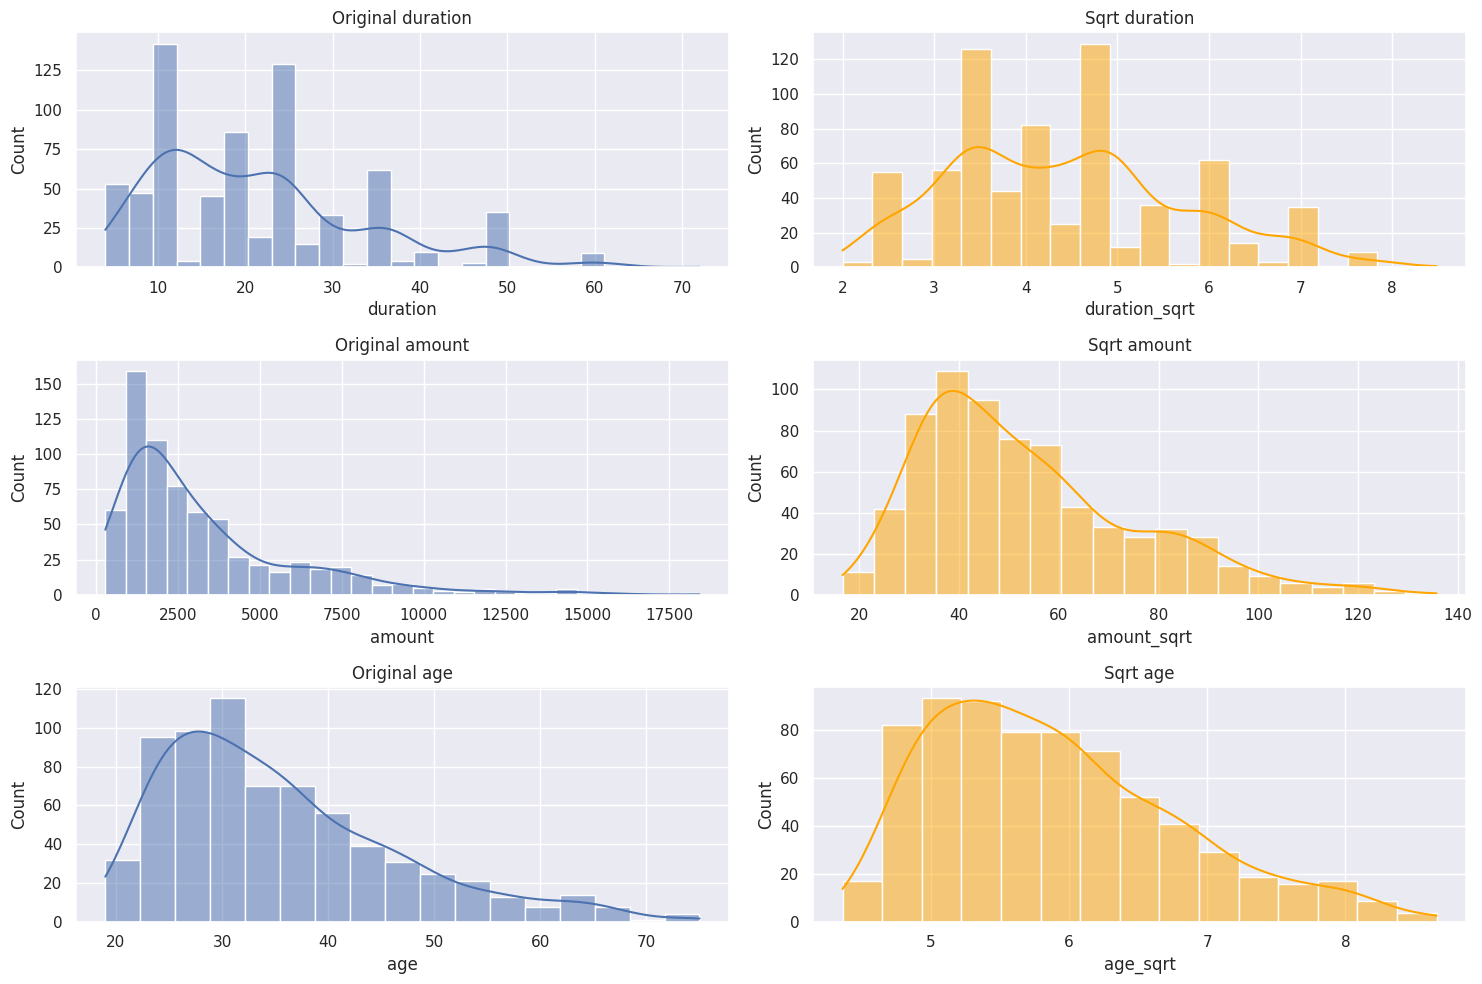

In [32]:
# Como primera aproximación encuentra qué transformación ajusta mejor los
# datos para corregir el sesgo de las variables numéricas. Deberás seleccionar
# una entre las funciones de Numpy de logaritmo, log(), o alguna de las
# potencias, power(), únicamente.
# Por el momento no aplicaremos una transformación para escalar los datos.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Primero, definimos las variables numéricas en base a tu conjunto de datos
numeric_vars = ['duration', 'amount', 'age']

# Creamos una copia de X_train para aplicar las transformaciones
tmpTransf = X_train.copy()

# Aplicamos las transformaciones: raíz cuadrada y logaritmo
for col in numeric_vars:
    # Aplicamos raíz cuadrada, asegurándonos de manejar solo valores positivos
    tmpTransf[col + '_sqrt'] = tmpTransf[col].apply(lambda x: np.sqrt(x) if x > 0 else 0)
    # Aplicamos logaritmo, sumando 1 para evitar el logaritmo de cero
    tmpTransf[col + '_log'] = tmpTransf[col].apply(lambda x: np.log(x + 1))

# Configuramos el tamaño de la figura para la visualización
sns.set(rc={'figure.figsize':(15, 10)})

# Creamos subplots para cada transformación
fig, axes = plt.subplots(len(numeric_vars), 2)

for i, col in enumerate(numeric_vars):
    # Visualización de la distribución original
    sns.histplot(X_train[col], kde=True, ax=axes[i, 0]).set_title(f'Original {col}')
    # Visualización de la distribución después de aplicar raíz cuadrada
    sns.histplot(tmpTransf[col + '_sqrt'], kde=True, ax=axes[i, 1], color='orange').set_title(f'Sqrt {col}')
    # Si deseas incluir la visualización del logaritmo, necesitarías ajustar el número de columnas en subplots y agregar la visualización aquí

plt.tight_layout()
plt.show()

# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Sí conviene aplicar alguna de estas transformaciones? Justifica tu respuesta.**

Duración (duration):

Original: Presenta un sesgo positivo con varios picos, lo cual puede ser indicativo de distintos grupos o tipos de créditos.
Transformada (Sqrt): La transformación de raíz cuadrada parece suavizar el sesgo y los picos, resultando en una distribución que se aproxima más a una normal.
Cantidad (amount):

Original: Muestra un sesgo positivo pronunciado, con la mayoría de los valores concentrados en el extremo inferior de la escala.
Transformada (Sqrt): La raíz cuadrada reduce notablemente el sesgo, acercando la distribución a una forma más simétrica y reduciendo la influencia de valores extremos altos.
Edad (age):

Original: Tiene una distribución que parece ser bimodal o al menos con múltiples picos.
Transformada (Sqrt): La transformación suaviza ligeramente la distribución, pero aún se pueden observar múltiples picos, lo que sugiere que la raíz cuadrada no es suficiente para normalizar completamente esta variable.


En general, la aplicación de una transformación de raíz cuadrada es efectiva para corregir el sesgo en las distribuciones de 'duration' y 'amount', haciéndolas más simétricas y potencialmente mejorando el desempeño de los algoritmos de aprendizaje automático que asumen o se benefician de la normalidad de las distribuciones de las variables de entrada.

La justificación para aplicar estas transformaciones radica en mejorar la linealidad de las relaciones y la estabilidad de las varianzas, lo cual es particularmente importante para modelos lineales y métodos basados en distancias. También ayuda a mitigar el impacto de los valores atípicos. Sin embargo, es crucial recordar que mientras estas transformaciones pueden mejorar el desempeño de ciertos modelos, también pueden dificultar la interpretación directa de los coeficientes del modelo y la importancia de las características.

# **Parte II : Entrenamiento de los modelos**

## **Ejercicio 11**

In [33]:
# Conjuntamos todas las transformaciones que aplicaremos a nuestras variables
# usando la clase Pipeline y el ColumnTransformer de sklearn, , donde las
# variables ordinales las dejaremos sin transformar.



# ************* Inlcuye aquí tu código:**************************************
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

# Definir una transformación de raíz cuadrada para las variables numéricas
def sqrt_transform(X):
    # Asegurarse de no tener valores negativos
    X = np.where(X < 0, 0, X)
    return np.sqrt(X)

# a) Crear un pipeline para las transformaciones numéricas
num_pipe = Pipeline(steps=[
    ('sqrt_transform', FunctionTransformer(sqrt_transform, validate=False))
])
num_pipe_nombres = ['duration', 'amount', 'age']  # Lista de variables numéricas

# b) Crear un pipeline para las transformaciones categóricas con OneHotEncoder
cat_pipe = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
cat_pipe_nombres = [
    'status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing'
]  # Lista de variables categóricas

# Combinar todas las transformaciones utilizando ColumnTransformer
# Las variables ordinales se dejan sin transformar y se pasan a través del parámetro 'remainder'
columnasTransformer = ColumnTransformer(transformers=[
    ('num_transf', num_pipe, num_pipe_nombres),
    ('cat_transf', cat_pipe, cat_pipe_nombres)
], remainder='passthrough')




In [34]:
# Veamos cuántas variables de más se están agragando por la transformación OneHotEncoder:

Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión antes de las transformaciones:", Xtmp.shape)
print("Dimensión después de las transformaciones:", tmp.shape)

TypeError: 'DataFrame' object is not callable

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento
# y validación en uno nuevo conjunto aumentado que llamaremos "trainval":

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)


print('Dimensiones de los nuevos datos concatenados sin transformar de entrenamiento de las variables de entrada y salida, respectivamente:\n',
      Xtrainval.shape, ytrainval.shape)

# **Ejercicio 12**

### **Con respecto al caso de un modelo subentrenado y en relación a la información de nuestro problema, responde la siguiente pregunta: ¿debajo de qué valor porcentual podemos decir que nuestro modelo estará subentrenado?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 13**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.Verifica
# además de que no queden subenetrenados o sobreentrenados con respecto a la
# métrica de la Exactitud (Accuracy).
# Te recomiendo que en todos aquellos modelos que tengan la opción
# del "random_state", lo utilices. Esto ayudará a que la variabilidad que se
# observe sea en lo posible, debida solamente al ajuste que estemos realizando
# en algún hiperparámetro y no por el proceso aleatorio en sí del entrenamiento.
# Consulta en dado caso la documentación de cada modelo para la mejor
# comprensión de los hiperparámetros que desees ajustar.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #

  # Regresión Logística:
  modelos.append(LogisticRegression( ))
  nombres.append('LR')


  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier( ))
  nombres.append('kNN')


  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier( ))
  nombres.append('DTree')


  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier( ))
  nombres.append('RF')


  # XGBoosting:
  modelos.append(XGBClassifier( ))
  nombres.append('XGBoost')


  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier( ))
  nombres.append('MLP')


  # Máquina de Vectores de Soporte:
  modelos.append(SVC( ))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************


  return modelos, nombres





# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.
# NOTA: Observa que el método de Validación-Cruzada llama a los resultados
#       del conjunto de validación como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=5)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.nanmean(scores[k]),np.nanstd(scores[k])))


## **Ejercicio 14**

### **De acuerdo a la información del problema, se tiene una matriz de costo que pondera diferente los Falsos Positivos y los Falsos Negativos.**

### **De acuerdo a la información de dicha matriz de costo, contesta las siguientes preguntas:**



### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   a.	¿Qué error se considera que es el más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

NOTA: Considera el etiquetado de las clases de acuerdo a nuestro problema.

*   b.	¿Cuál o cuáles sería entonces la métrica o métricas a considerar como más importantes?


### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 15**

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos
# y los resultados de los conjuntos de validación, con respecto a la métrica que
# consideraste más importante en el ejercicio anterior. Para ello proporciona el
# nombre (string) de la métrica del conjunto de validación que consideraste más
# importante en el ejercicio anterior.

# ************* Inlcuye aquí tu código:**************************

str_mejor_metrica = None

# *********** Aquí termina la sección de agregar código *************



sns.set(rc={'figure.figsize':(8,4)})
databox = [resultados[j][str_mejor_metrica] for j in range(len(resultados))]


plt.boxplot(databox, labels=nombres, showmeans=True)
plt.show()


# **Ejercicio 16**

In [ ]:
# A partir de los mejores hiperparámetros obtenidos en el ejercicio anterior,
# selecciona el modelo de balanceo que consideres da el mejor desempeño.
# Deberás seleccionar entre el SMOTE, TomekLinks y SMOTEENN de ImbalancedLearn.
# Prueba cada uno de estos métodos de muestreo y/o submuestreo para que veas el
# desempeño de cada uno de ellos, pero al final solamente debes dejar en tu
# código el que consideraste que te dio el mejor desempeño con respecto a la
# métrica que seleccionaste en el ejercicio 14.



# ************* Inlcuye aquí tu código:**************************

metodo_underoversampling = None
Xtv_uosamp, ytv_uosamp = None

# *********** Aquí termina la sección de agregar código *************




modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
                                 random_state=5
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtv_uosamp,
                          ytv_uosamp,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))



# **Ejercicio 17**

In [ ]:
# Obtener un nuevo diagrama de caja y bigotes múltiple de todos los modelos con
# la técnica de submuestreo y/o sobremuestreo que hayas seleccionado, usando los
#  resultados de los conjuntos de validación y con respecto a la métrica que has
# considerado la mejor:



# ************* Inlcuye aquí tu código:******************************

None


# *********** Aquí termina la sección de agregar código *************


plt.show()

# **Parte III: Mejor modelo**

## **Ejercicio 18**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora, así como la métrica utilizada. Usando solamente este mejor modelo, busca si puedes mejorar el desempeño haciendo un mejor ajuste de los hiperparámetros y usando la métrica que consideraste la más importante para este problema. Verifica que tu modelo no esté sobreentrenado o subentrenado con dicha métrica.**

### **Incluye tu justificación de cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

In [ ]:
# Incluye todo el código que consideres necesario para que con el mejor
# modelo que tienes hasta ahora, puedas mejorar aún un poco más su
# desempeño con respecto a la métrica que estás utilizando:


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 19**

In [ ]:
# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio
# anterior, utiliza ahora (por primera vez en la actividad) el conjunto de
# prueba (test set) para:


# a.	Obtener la matriz de confusión.


# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# b.	El reporte de todas las métricas con el método “classification_report()” de sklearn.


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de
# este mejor modelo con el conjunto de prueba (test), que incluya un gráfico de
# barras con la importancia de los factores. Incluye tus conclusiones al
# respecto y en particular indica si consideras razonables los factores más
# importantes obtenidos.



# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

### **Incluye aquí tus comentarios sobre los factores más importantes obtenidos.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 20**

### **Reporta tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

>> ### **Fin de la Actividad South German Credit Card.**